# Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [2]:
c_df = pd.read_csv('ClimateData.csv')
c_df.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


# Data Understanding and Summary

In [3]:
c_df.columns

Index(['id', 'building_class', 'floor_area', 'year_built',
       'precipitation_inches', 'snowfall_inches', 'avg_temp', 'days_with_fog',
       'site_eui'],
      dtype='object')

In [4]:
# Check data types

# Check data types
data_types = c_df.dtypes

# Print data types along with additional information
print("Data Types and Additional Information:")
for column in c_df.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {c_df[column].nunique()}")
    print(f" - Sample Values: {c_df[column].dropna().unique()[:5]}")  # Display first 5 unique non-null values
    print()

Data Types and Additional Information:
Column: id
 - Data Type: int64
 - Number of Unique Values: 75757
 - Sample Values: [0 1 2 3 4]

Column: building_class
 - Data Type: object
 - Number of Unique Values: 2
 - Sample Values: ['Commercial' 'Residential']

Column: floor_area
 - Data Type: float64
 - Number of Unique Values: 20433
 - Sample Values: [ 61242. 274000. 280025.  55325.  66000.]

Column: year_built
 - Data Type: float64
 - Number of Unique Values: 180
 - Sample Values: [1942. 1955. 1951. 1980. 1985.]

Column: precipitation_inches
 - Data Type: float64
 - Number of Unique Values: 171
 - Sample Values: [16.59 10.43  6.64  8.04  1.69]

Column: snowfall_inches
 - Data Type: float64
 - Number of Unique Values: 71
 - Sample Values: [ 0.   1.3 84.8 54.9 27.5]

Column: avg_temp
 - Data Type: float64
 - Number of Unique Values: 173
 - Sample Values: [56.97260274 64.25136612 64.18306011 62.94917582 74.68493151]

Column: days_with_fog
 - Data Type: float64
 - Number of Unique Values: 42

In [5]:
climate_size=c_df.shape
print("Dataset Size:",climate_size)

Dataset Size: (75757, 9)


In [6]:
c_info = c_df.info()
c_head = c_df.head()

c_info, c_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75757 non-null  int64  
 1   building_class        75757 non-null  object 
 2   floor_area            75757 non-null  float64
 3   year_built            73920 non-null  float64
 4   precipitation_inches  75757 non-null  float64
 5   snowfall_inches       75757 non-null  float64
 6   avg_temp              75757 non-null  float64
 7   days_with_fog         29961 non-null  float64
 8   site_eui              75757 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.2+ MB


(None,
    id building_class  floor_area  year_built  precipitation_inches  \
 0   0     Commercial     61242.0      1942.0                 16.59   
 1   1     Commercial    274000.0      1955.0                 16.59   
 2   2     Commercial    280025.0      1951.0                 16.59   
 3   3     Commercial     55325.0      1980.0                 16.59   
 4   4     Commercial     66000.0      1985.0                 16.59   
 
    snowfall_inches   avg_temp  days_with_fog  site_eui  
 0              0.0  56.972603            NaN    248.68  
 1              0.0  56.972603           12.0     26.50  
 2              0.0  56.972603           12.0     24.69  
 3              0.0  56.972603           12.0     48.41  
 4              0.0  56.972603            NaN      3.90  )

[Insert Comment Soon]

# Unique Value Analysis

In [7]:
print(c_df['building_class'].unique())

['Commercial' 'Residential']


In the building_class category, there exists two unique values: Commercial and Residential. These two values help classify which building fits as a Commercial Building or a Residential housing building

In [8]:
for col in c_df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{c_df[col].value_counts()}\n")

Value counts for building_class:
Residential    43558
Commercial     32199
Name: building_class, dtype: int64



# Descriptive Statistics

In [9]:
c_df.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


- ***id:*** Nothing of import in this category as it is just increasing in order of row
- ***floor_area:***
- ***year_built:***
- ***precipitation_inches:***
- ***snowfall_inches:***
- ***avg_temp:***
- ***days_with_fog:***
- ***site_eui:***

# Missing Values Assessment

In [10]:
invalid_entries = c_df[c_df.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 id                      0
building_class          0
floor_area              0
year_built              0
precipitation_inches    0
snowfall_inches         0
avg_temp                0
days_with_fog           0
site_eui                0
dtype: int64


In [11]:
missing_df=c_df.isnull().sum()
print('Missing data:\n',missing_df)

Missing data:
 id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64


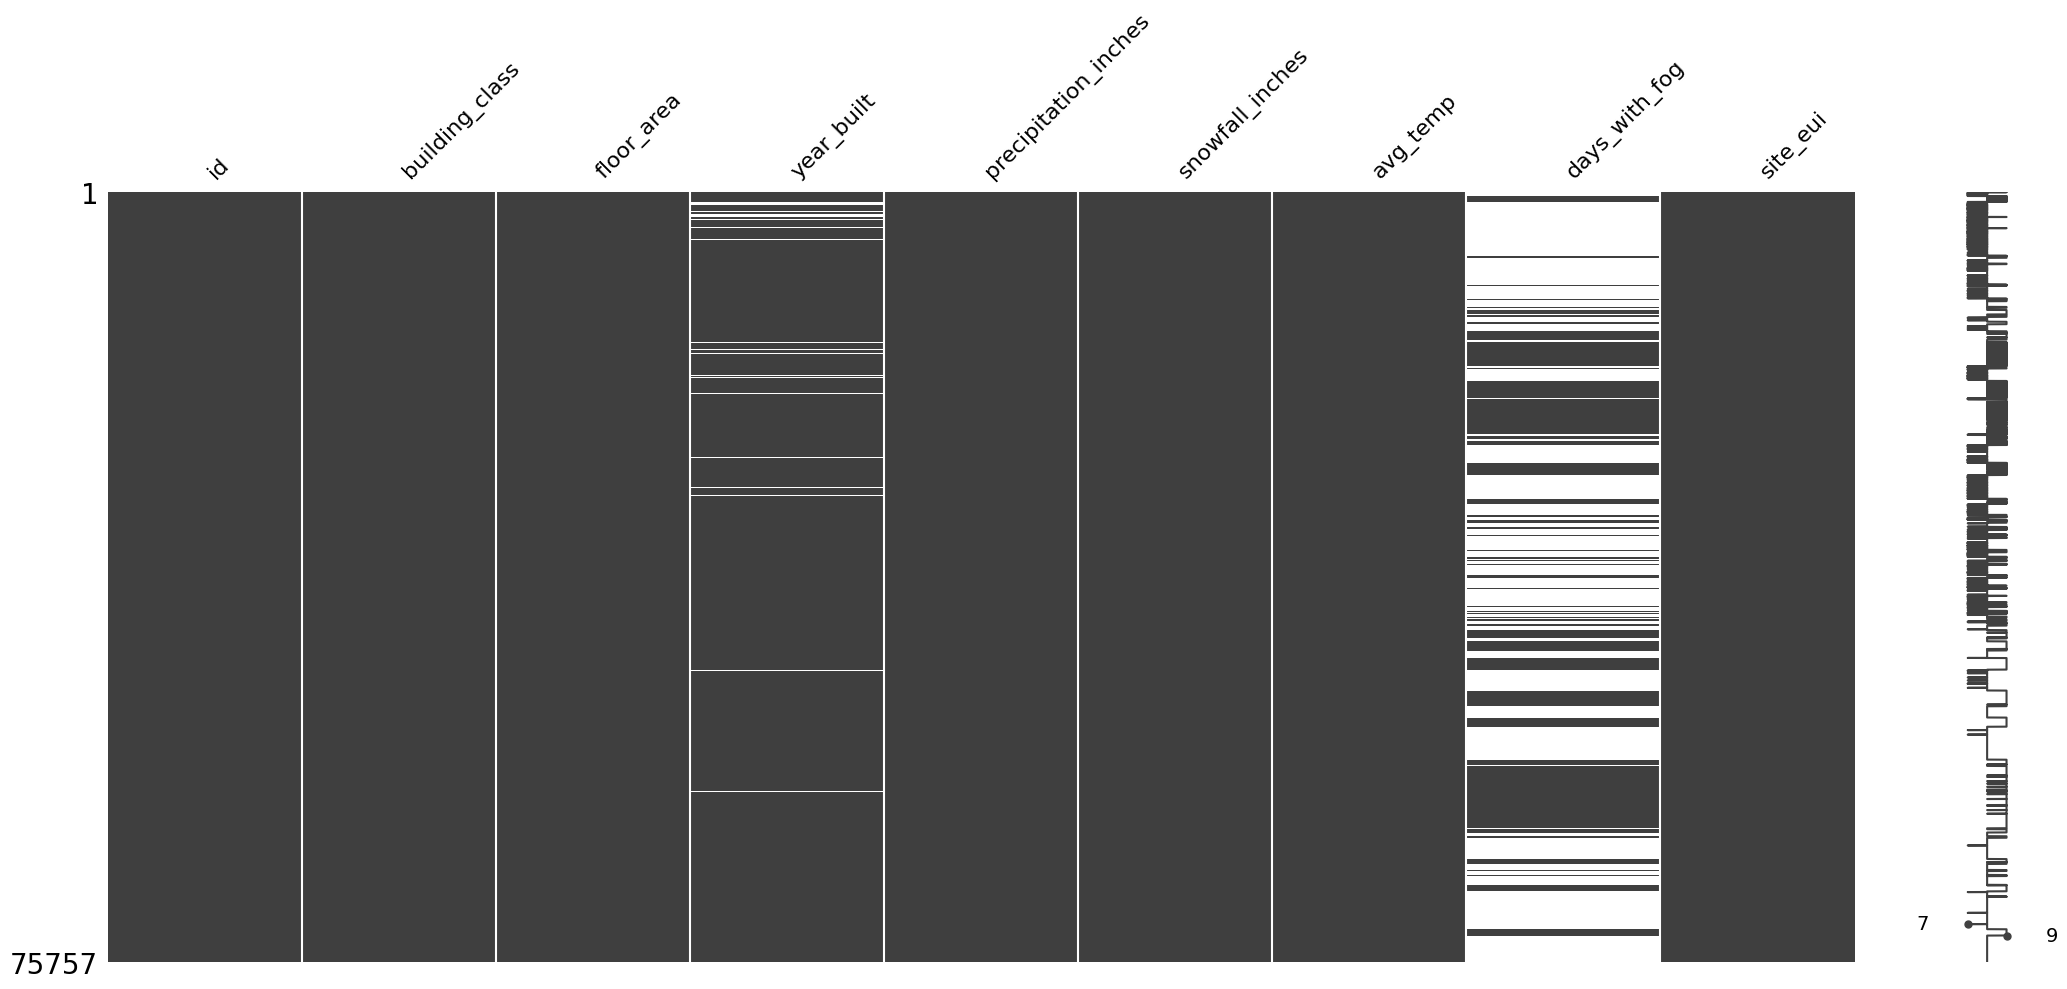

In [12]:
ms.matrix(c_df)
plt.show()

There looks to be approximately 1837 missing entries in the year_built column and 45,796 entries missing in the days_with_fog column

These missing data entries among 75,757 rows tell us that we may not lose much if we remove/impute the empty cells under the year_built column, however, the same cannot be told for the days_with_fog column as that is almost half of the dataset that is missing. If we remove it, we will lose a significant amount of data but if we impute it with the mean/median, we may be able to slightly skew the data to where we can fully assess how much this category correlates with others

# Missing Data Handling

There are multiple ways to handle the missing data in the dataset, so we'll explore using Mean and Median imputation

In [13]:
# imputing the median for year_built
c_df['year_built'].fillna(c_df['year_built'].median(), inplace=True)
c_df['days_with_fog'].fillna(c_df['days_with_fog'].mean(), inplace=True)

In [14]:
# Viewing the new dataframe with missing data filled in
missing_df=c_df.isnull().sum()
print('Missing data:\n',missing_df)

Missing data:
 id                      0
building_class          0
floor_area              0
year_built              0
precipitation_inches    0
snowfall_inches         0
avg_temp                0
days_with_fog           0
site_eui                0
dtype: int64


# Duplicate Records

In [15]:
duplicates= c_df.duplicated().sum()
print("Number of Duplicated Entries: ",duplicates)

Number of Duplicated Entries:  0


In [16]:
# Let's drop the duplicated data
c_df = c_df.drop_duplicates()

# Outlier Detection with Boxplots

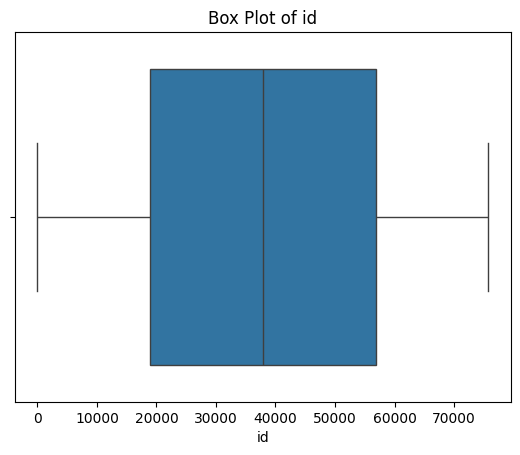

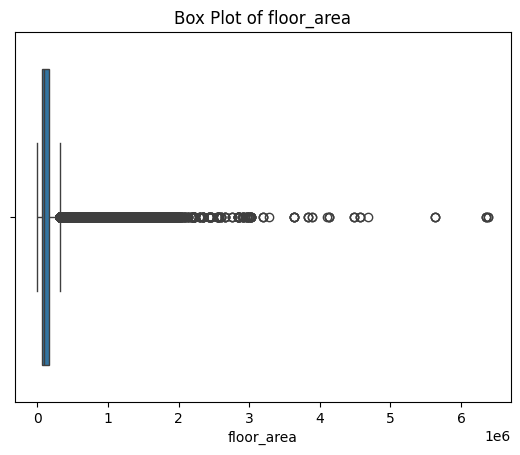

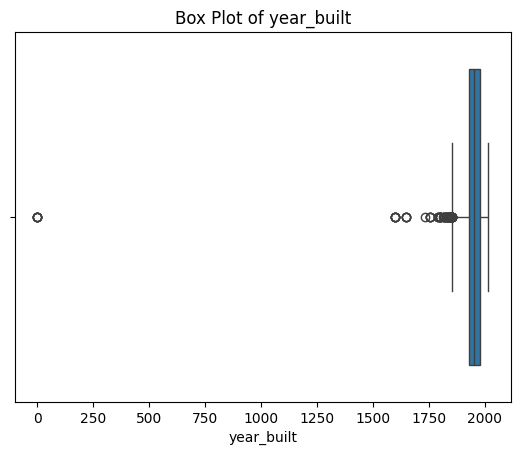

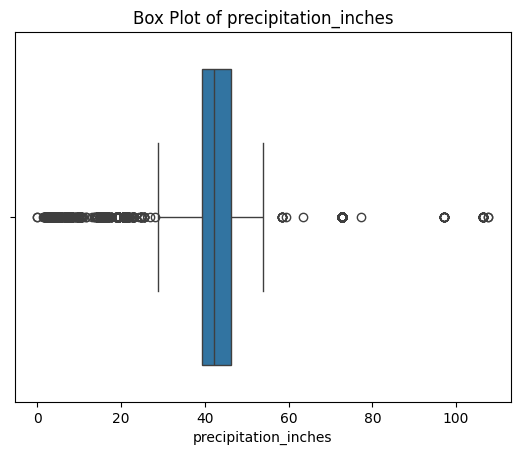

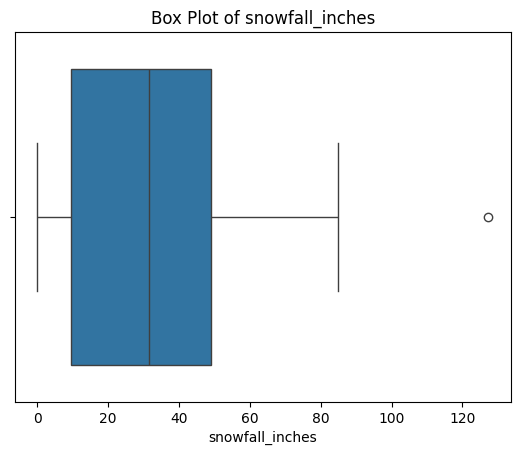

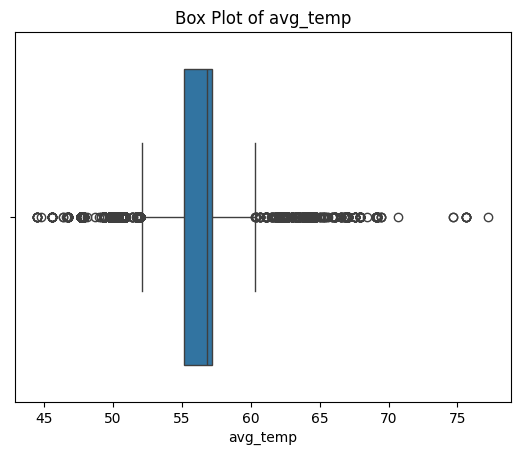

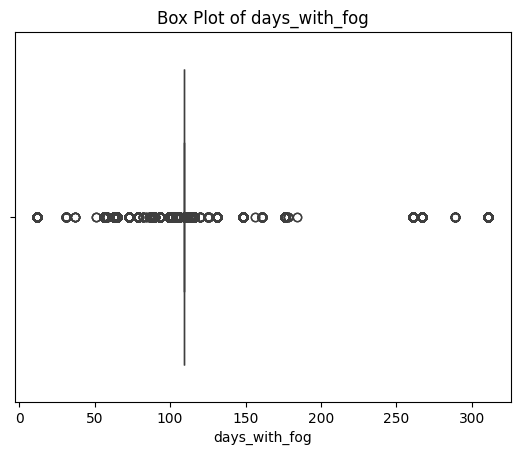

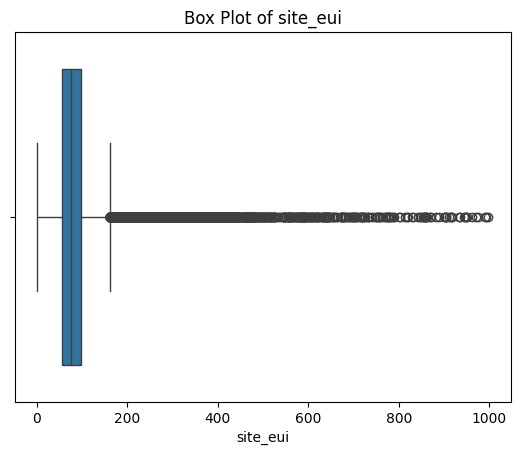

In [17]:
for col in c_df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=c_df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

To address the outliers, we could standardize the data so that it contains the z-score of every column and row. 

# Histogram Analysis for Distribution

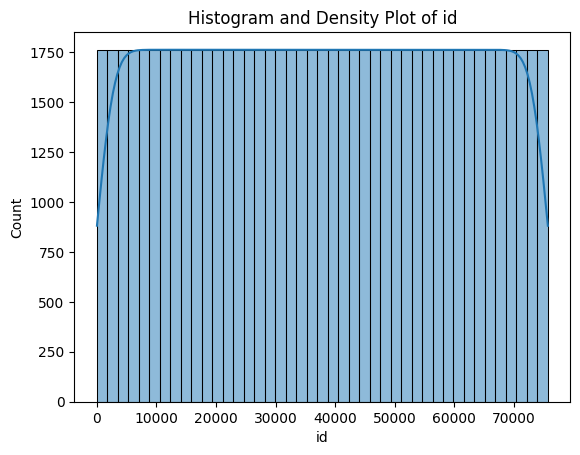

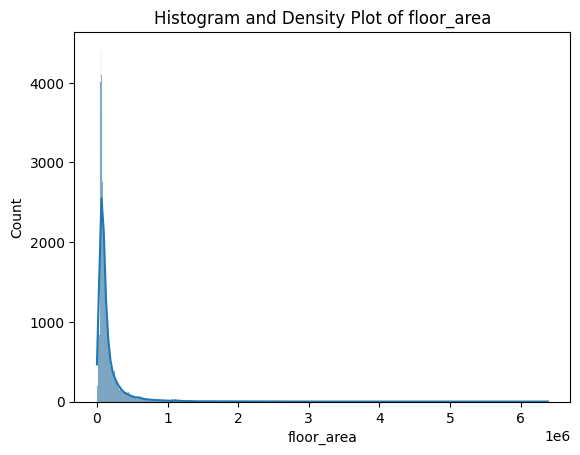

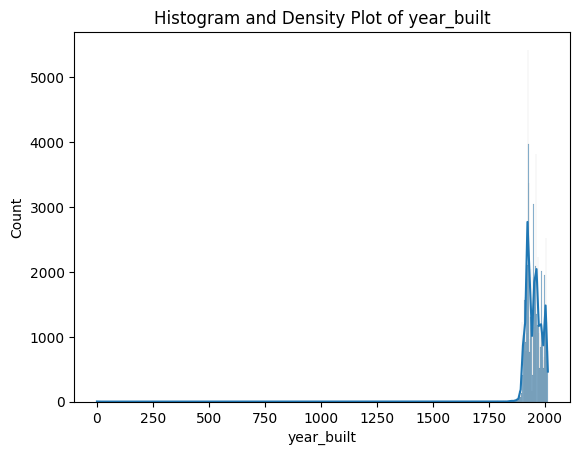

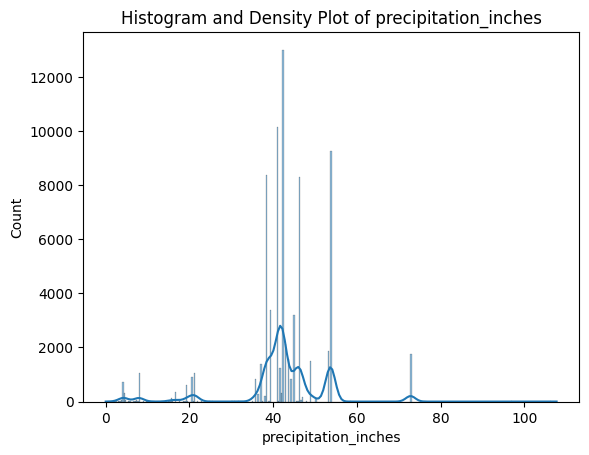

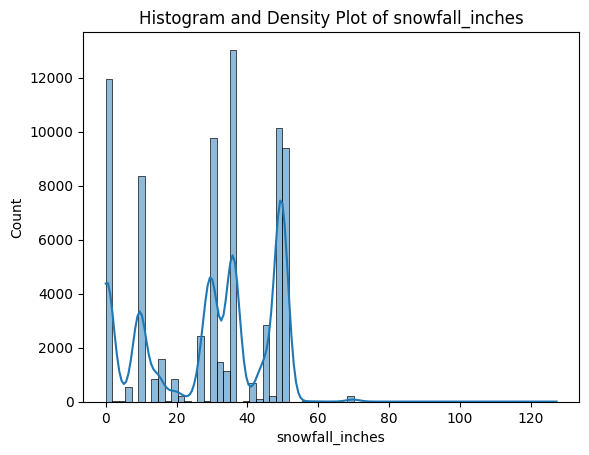

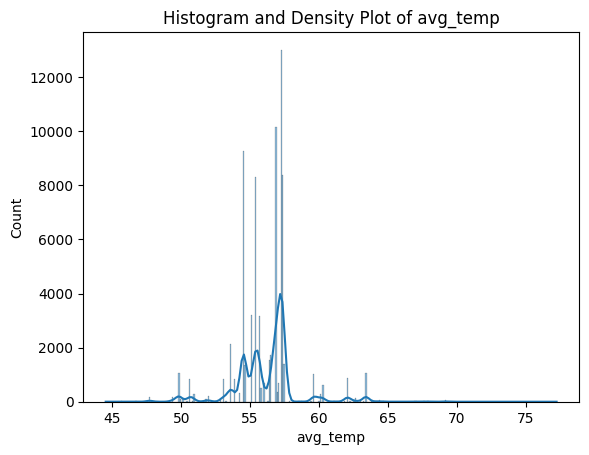

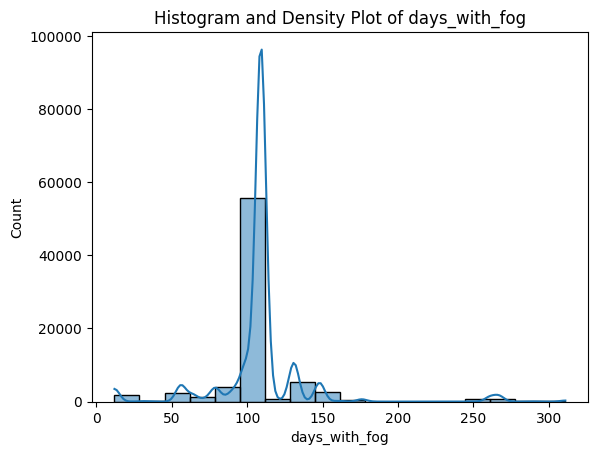

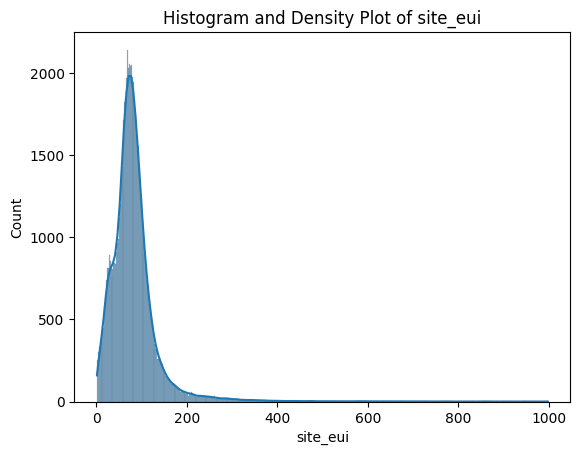

In [18]:
for col in c_df.select_dtypes(include=['number']).columns:
    sns.histplot(c_df[col],kde = True)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.show()

# Feature Scaling

Varied Scales: Features like floor area, year built, and site energy use intensity (EUI) differ significantly in size, impacting the model's performance.

Efficient Algorithms: Many machine learning algorithms, especially those using gradient descent or distances, work better when features are on a similar scale.

Quick Convergence: Scaling helps algorithms converge faster by ensuring all features contribute equally to the model's learning process.

In essence, scaling prevents any single feature from dominating, leading to more balanced and effective machine learning models.

# Outlier Detection with Z-Score

In [19]:
# Lets define a function to detect outliers based on the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply outlier detection
outliers_floor = detect_outliers(c_df['floor_area']).sum()
outliers_rain = detect_outliers(c_df['precipitation_inches']).sum()
outliers_snow = detect_outliers(c_df['snowfall_inches']).sum()
outliers_temps = detect_outliers(c_df['avg_temp']).sum()
outliers_days = detect_outliers(c_df['days_with_fog']).sum()
outliers_eui = detect_outliers(c_df['site_eui']).sum()

outliers_summary = {
    'Floor Area Outliers': outliers_floor,
    'Precipitation Inches Outliers': outliers_rain,
    'Snowfall Inches Outliers': outliers_snow,
    'Average Temperature Outliers': outliers_temps,
    'Days with Fog Outliers': outliers_days,
    'Site Eui Outliers': outliers_eui
}

outliers_summary

{'Floor Area Outliers': 8245,
 'Precipitation Inches Outliers': 7365,
 'Snowfall Inches Outliers': 1,
 'Average Temperature Outliers': 5730,
 'Days with Fog Outliers': 29961,
 'Site Eui Outliers': 3844}

### Outlier Analysis
- **Floor Area Outliers:** 8245 entries are currently identified as outliers, suggesting that these values fall SIGNIFICANTLY outside of the range expected for the category. This can range drastically as you compare Commercial and Residential buildings.

- **Precipitation Inches Outliers:** 7365 entries in this category fall outside the range, which tells us that either a specific building experiences a lot of rainfall or not so much.

- **Average Temperature Outliers:** 5730 entries fall outside of this range, suggesting the fact that some buildings may experience a colder temperature or a warmer temperature that is vastly different from the average.

- **Snowfall Inches Outliers:** Only 1 outlier was detected, which means the average inches of snow falls relatively within range.

- **Days with Fog Outliers:** There are approximately 29,961 entries that do not fall within the traditional range. This suggests that any building would typically experiences less days with fog or many days, perhaps even up to months of fog.

- **Site EUI Outliers:** There exists 3844 entries that are outside the range of this category. It can be assumed that these building owners typically pay less or more of the utilities than the average building owner.

### Handling Outliers

In [20]:
# For Floor Area
Q1_floor = c_df['floor_area'].quantile(0.25)
Q3_floor = c_df['floor_area'].quantile(0.25)
IQR_floor = Q3_floor - Q1_floor
lower_b = Q1_floor -1.5 * IQR_floor
upper_b = Q3_floor +1.5 * IQR_floor

c_df['floor_area']= c_df['floor_area'].clip(lower=lower_b, upper=upper_b)

In [21]:
# For Precipitation
Q1 = c_df['precipitation_inches'].quantile(0.25)
Q3 = c_df['precipitation_inches'].quantile(0.25)
IQR = Q3 - Q1
lower_b = Q1 -1.5 * IQR
upper_b = Q3 +1.5 * IQR

c_df['precipitation_inches']= c_df['precipitation_inches'].clip(lower=lower_b, upper=upper_b)

In [22]:
# For Avg Temp
Q1 = c_df['avg_temp'].quantile(0.25)
Q3 = c_df['avg_temp'].quantile(0.25)
IQR = Q3 - Q1
lower_b = Q1 -1.5 * IQR
upper_b = Q3 +1.5 * IQR

c_df['avg_temp']= c_df['avg_temp'].clip(lower=lower_b, upper=upper_b)

In [23]:
# For Site EUI
Q1 = c_df['site_eui'].quantile(0.25)
Q3 = c_df['precipitation_inches'].quantile(0.25)
IQR = Q3 - Q1
lower_b = Q1 -1.5 * IQR
upper_b = Q3 +1.5 * IQR

c_df['site_eui']= c_df['site_eui'].clip(lower=lower_b, upper=upper_b)

In [24]:
c_df.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,75757.0,75757.000000,7.575700e+04,75757.000000,7.575700e+04,75757.000000,75757.000000
mean,37878.000000,62379.0,1952.275077,3.935000e+01,29.136379,5.514754e+01,109.142051,63.627009
std,21869.306509,0.0,36.602159,1.421095e-14,17.810894,2.131642e-14,31.883663,18.836437
min,0.000000,62379.0,0.000000,3.935000e+01,0.000000,5.514754e+01,12.000000,16.580000
25%,18939.000000,62379.0,1927.000000,3.935000e+01,9.600000,5.514754e+01,109.142051,54.530000
50%,37878.000000,62379.0,1951.000000,3.935000e+01,31.600000,5.514754e+01,109.142051,75.290000
75%,56817.000000,62379.0,1976.000000,3.935000e+01,49.100000,5.514754e+01,109.142051,77.300000
max,75756.000000,62379.0,2015.000000,3.935000e+01,127.300000,5.514754e+01,311.000000,77.300000


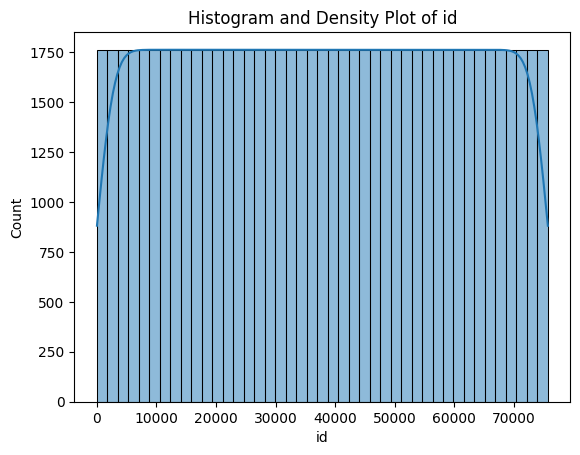

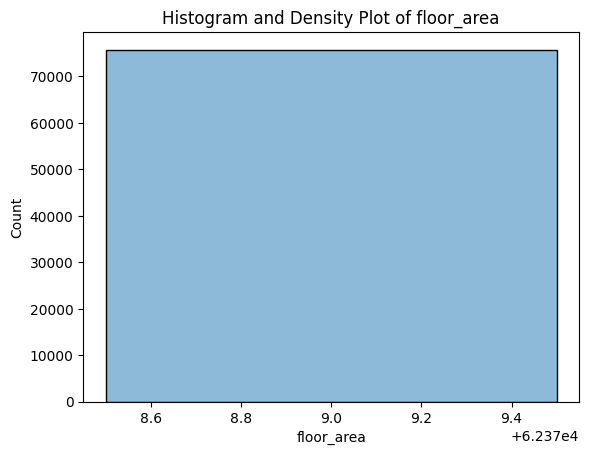

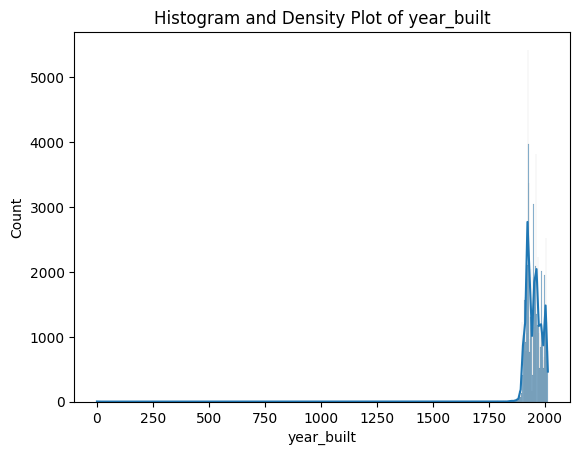

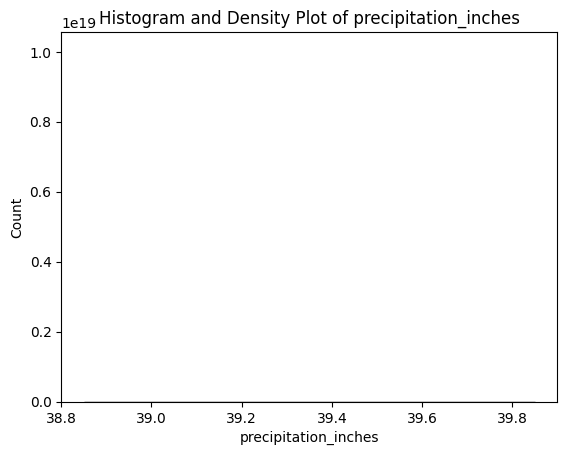

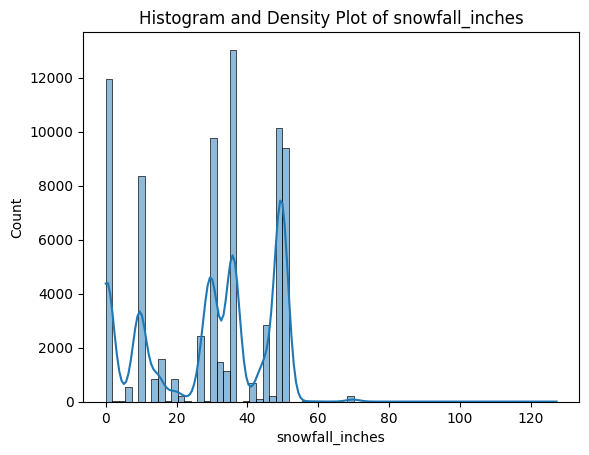

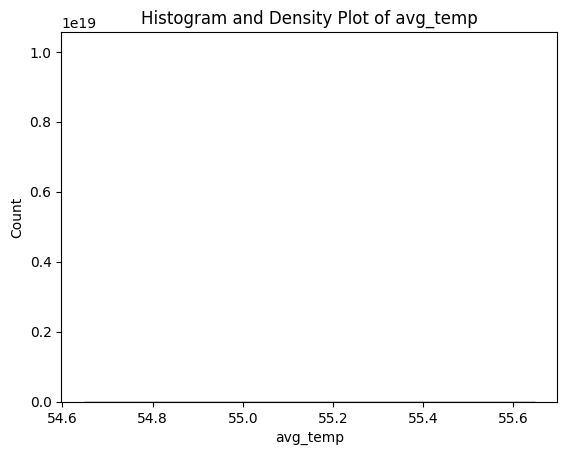

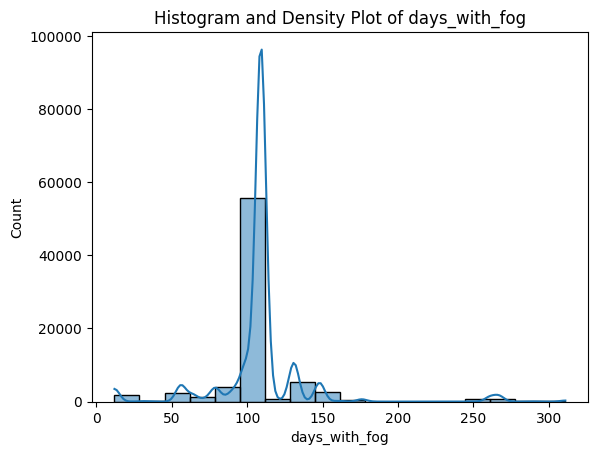

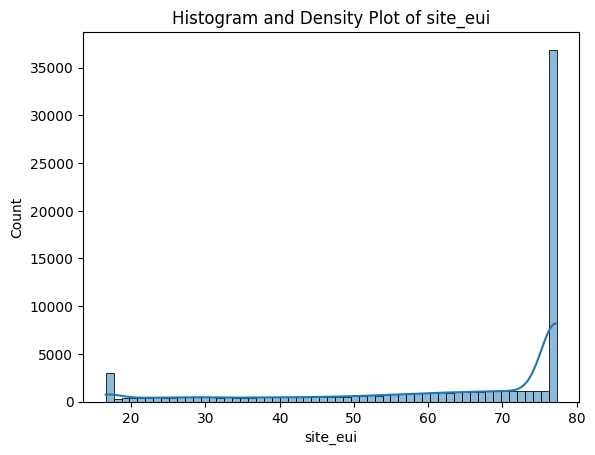

In [25]:
for col in c_df.select_dtypes(include=['number']).columns:
    sns.histplot(c_df[col],kde = True)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.show()

# Range Analysis

In [35]:
df_max=c_df.max(axis=0) # will return max value of each column
df_max

id                            75756.000000
floor_area                    62379.000000
year_built                     2015.000000
precipitation_inches             39.350000
snowfall_inches                 127.300000
avg_temp                         55.147541
days_with_fog                   311.000000
site_eui                         77.300000
building_class_Commercial         1.000000
building_class_Residential        1.000000
dtype: float64

In [36]:
df_min=c_df.min(axis=0)
df_min

id                                0.000000
floor_area                    62379.000000
year_built                        0.000000
precipitation_inches             39.350000
snowfall_inches                   0.000000
avg_temp                         55.147541
days_with_fog                    12.000000
site_eui                         16.580000
building_class_Commercial         0.000000
building_class_Residential        0.000000
dtype: float64

In [37]:
c_df_range = c_df.max(axis=0) - c_df.min(axis=0)
c_df_range

id                            75756.00
floor_area                        0.00
year_built                     2015.00
precipitation_inches              0.00
snowfall_inches                 127.30
avg_temp                          0.00
days_with_fog                   299.00
site_eui                         60.72
building_class_Commercial         1.00
building_class_Residential        1.00
dtype: float64

After viewing the range for each column, I can safely assume that the data is normally distributed and can be fit for a model training

# Encoding Categorical Variables

In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
c_df = pd.get_dummies(c_df,columns=['building_class'], 
                      prefix=['building_class'])

c_df.head()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui,building_class_Commercial,building_class_Residential
0,0,62379.0,1942.0,39.35,0.0,55.147541,109.142051,77.30,1,0
1,1,62379.0,1955.0,39.35,0.0,55.147541,12.000000,26.50,1,0
2,2,62379.0,1951.0,39.35,0.0,55.147541,12.000000,24.69,1,0
3,3,62379.0,1980.0,39.35,0.0,55.147541,12.000000,48.41,1,0
4,4,62379.0,1985.0,39.35,0.0,55.147541,109.142051,16.58,1,0
